This is a beginner script to Compare Upgrade MC data (Queso) to low energy DeepCore data (Greco)

Queso file were prior converted vom .i3 to .npy using https://github.com/mjlarson/nusources_dataset_converters/tree/main

In [2]:
import os, sys, glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from tqdm.notebook import tqdm
from scipy.integrate import simps
import histlite as hl
import sys
from IPython.display import clear_output

figsize = (6,4.5)
def format_plot(ax, log=None,grid=None):
    SPINE_COLOR = "grey"
    for spine in ['top', 'right']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.8)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    i=0
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)
        if i==0 and (log == 'x' or log == 'xy'):
            axis.set_tick_params(direction='out', which = 'minor', color=SPINE_COLOR)
        if i == 1 and (log == 'y' or log == 'xy'):
            axis.set_tick_params(direction='out', which = 'minor', color=SPINE_COLOR)
        i = i+1
    ax.set_axisbelow(False) 
    if grid:
        ax.grid(color = "#595959", ls = '--', lw = 0.75,alpha=0.75)
        plt.rc('axes', axisbelow=True)
    plt.rcParams.update({
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'figure.figsize': figsize
    })
    
    plt.tight_layout()
    return ax


print('loaded')

loaded


# Readin

<font color='red'>Question:</font> the taubar dataset is not available for Queso. For Greco it is already merged (tau + taubar)? Is this a problem since some properties are calculated with all flavors?

In [3]:
#QUESO files
path = "/home/mdittmer/Basics/ConvertedQuesoFiles_new/"
prefix = "queso_"

queso_e_only = np.load(path + prefix + "120028.npy")
queso_e_only_CC = queso_e_only[queso_e_only['interaction']==1]
queso_e_only_NC = queso_e_only[queso_e_only['interaction']==2]

queso_ebar_only = np.load(path + prefix + "121028.npy")
queso_ebar_only_CC = queso_ebar_only[queso_ebar_only['interaction']==1]
queso_ebar_only_NC = queso_ebar_only[queso_ebar_only['interaction']==2]

queso_mu_only = np.load(path + prefix + "140028.npy")
queso_mu_only_CC = queso_mu_only[queso_mu_only['interaction']==1]
queso_mu_only_NC = queso_mu_only[queso_mu_only['interaction']==2]

queso_mubar_only = np.load(path + prefix + "141028.npy")
queso_mubar_only_CC = queso_mubar_only[queso_mubar_only['interaction']==1]
queso_mubar_only_NC = queso_mubar_only[queso_mubar_only['interaction']==2]

queso_tau_only = np.load(path + prefix + "160028.npy")
queso_tau_only_CC = queso_tau_only[queso_tau_only['interaction']==1]
queso_tau_only_NC = queso_tau_only[queso_tau_only['interaction']==2]

queso_taubar_only = np.load(path + prefix + "161028.npy")
queso_taubar_only_CC = queso_taubar_only[queso_taubar_only['interaction']==1]
queso_taubar_only_NC = queso_taubar_only[queso_taubar_only['interaction']==2]




#combine files
queso_e = np.concatenate([queso_e_only, queso_ebar_only])
queso_mu = np.concatenate([queso_mu_only, queso_mubar_only])
queso_tau = np.concatenate([queso_tau_only, queso_taubar_only])
queso_all = np.concatenate([queso_e, queso_mu, queso_tau])
#del queso_e, queso_mu, queso_tau

queso_e_CC = np.concatenate([queso_e_only_CC, queso_ebar_only_CC])
queso_mu_CC = np.concatenate([queso_mu_only_CC, queso_mubar_only_CC])
queso_tau_CC = np.concatenate([queso_tau_only_CC, queso_taubar_only_CC])
queso_all_CC = np.concatenate([queso_e_CC, queso_mu_CC, queso_tau_CC])
del queso_e_CC, queso_mu_CC, queso_tau_CC

queso_e_NC = np.concatenate([queso_e_only_NC, queso_ebar_only_NC])
queso_mu_NC = np.concatenate([queso_mu_only_NC, queso_mubar_only_NC])
queso_tau_NC = np.concatenate([queso_tau_only_NC, queso_taubar_only_NC])
queso_all_NC = np.concatenate([queso_e_NC, queso_mu_NC, queso_tau_NC])
del queso_e_NC, queso_mu_NC, queso_tau_NC



#GRECO files

greco_e  = np.load("/data/ana/analyses/greco_online/version-002-p12/IC86_2012.nue_merged.npy")
greco_mu = np.load("/data/ana/analyses/greco_online/version-002-p12/IC86_2012.numu_merged.npy")
greco_tau= np.load("/data/ana/analyses/greco_online/version-002-p12/IC86_2012.nutau_merged.npy")

greco_e_only = greco_e[greco_e['ptype']==12]
greco_e_only_CC = greco_e_only[greco_e_only['iscc']== True]
greco_e_only_NC = greco_e_only[greco_e_only['iscc']== False]

greco_ebar_only = greco_e[greco_e['ptype']==-12]
greco_ebar_only_CC = greco_ebar_only[greco_ebar_only['iscc']== True]
greco_ebar_only_NC = greco_ebar_only[greco_ebar_only['iscc']== False]

greco_mu_only = greco_mu[greco_mu['ptype']==14]
greco_mu_only_CC = greco_mu_only[greco_mu_only['iscc']== True]
greco_mu_only_NC = greco_mu_only[greco_mu_only['iscc']== False]

greco_mubar_only = greco_mu[greco_mu['ptype']==-14]
greco_mubar_only_CC = greco_mubar_only[greco_mubar_only['iscc']== True]
greco_mubar_only_NC = greco_mubar_only[greco_mubar_only['iscc']== False]

greco_tau_only = greco_tau[greco_tau['ptype']==16]
greco_tau_only_CC = greco_tau_only[greco_tau_only['iscc']== True]
greco_tau_only_NC = greco_tau_only[greco_tau_only['iscc']== False]

greco_taubar_only = greco_tau[greco_tau['ptype']==-16]
greco_taubar_only_CC = greco_taubar_only[greco_taubar_only['iscc']== True]
greco_taubar_only_NC = greco_taubar_only[greco_taubar_only['iscc']== False]


#combine files
greco_e = np.concatenate([greco_e_only, greco_ebar_only])
greco_mu = np.concatenate([greco_mu_only, greco_mubar_only])
greco_tau = np.concatenate([greco_tau_only, greco_taubar_only])
greco_all = np.concatenate([greco_e, greco_mu, greco_tau])
del greco_e, greco_mu, greco_tau

greco_e_CC = np.concatenate([greco_e_only_CC, greco_ebar_only_CC])
greco_mu_CC = np.concatenate([greco_mu_only_CC, greco_mubar_only_CC])
greco_tau_CC = np.concatenate([greco_tau_only_CC, greco_taubar_only_CC])
greco_all_CC = np.concatenate([greco_e_CC, greco_mu_CC, greco_tau_CC])
del greco_e_CC, greco_mu_CC, greco_tau_CC

greco_e_NC = np.concatenate([greco_e_only_NC, greco_ebar_only_NC])
greco_mu_NC = np.concatenate([greco_mu_only_NC, greco_mubar_only_NC])
greco_tau_NC = np.concatenate([greco_tau_only_NC, greco_taubar_only_NC])
greco_all_NC = np.concatenate([greco_e_NC, greco_mu_NC, greco_tau_NC])
del greco_e_NC, greco_mu_NC, greco_tau_NC

      
plotfolder = 'Comparison_Split_correct/'
if not os.path.exists(plotfolder):
    os.mkdir(plotfolder)
print('loaded')

loaded


# Effective area

weighted by x['ow'][mask]

calculate effective area per energy bin for given declinations per neutrino flavor (Michaels code: https://github.com/mjlarson/effective_area_example/blob/main/aeff_plot.ipynb)

compare GRECO and QUESO

calculate intersection point for a given declination and save into file

In [4]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.optimize import differential_evolution
from scipy.signal import savgol_filter

def converttag(tag):
    return tag.replace('\\', "").replace('nu_', "nu").replace('bar', "anti_").replace('{', "").replace('}', "").replace('^', "_").replace('(', "").replace(')', "").replace(' ', "").replace('+', "_and_").replace('$', "")

def smooth_data_savgol(x, y, window_size=11, polyorder=4):
    y_smoothed = savgol_filter(y, window_size, polyorder)
    return x, y_smoothed

def save_intersection_data(intersection_points, declinations, nametag, filename ='Intersectionpoints.txt'):
    # Read existing content to check for duplicates
    try:
        with open(filename, 'r') as file:
            existing_lines = set(file.readlines())
    except FileNotFoundError:
        existing_lines = set()

    # Append new records to the file
    with open(filename, 'a') as file:
        for point, declination in zip(intersection_points, declinations):
            new_record = f"{point} {np.degrees(declination)} {nametag}\n"
            if new_record not in existing_lines:
                file.write(new_record)
                existing_lines.add(new_record)

def make_aeff(ax, x, 
              ebins, 
              dec_min = -np.pi/2.,
              dec_max = np.pi/2.,
              **kwargs):

    # Mask the events to the correct range of declinations and
    # histogram the 'oneweight' values. This will give us a histogram
    # in the same units as 'ow', which means we'll have `GeV cm2 sr`
    # after this step.
    mask = (dec_min <= x['trueDec']) & (x['trueDec'] <= dec_max)
    #mask = np.logical_and(dec_min <= x['trueDec'], x['trueDec'] <= dec_max)

    h, b = np.histogram(x['trueE'][mask],
                        weights = x['ow'][mask],# * x['trueE'][mask]**(-2.5),
                        bins=ebins)

    # Now account for the phase space, which will reduce us from
    # `GeV cm2 sr` to `cm2`
    h /= np.diff(b)
    h /= 2*np.pi
    h /= (np.sin(x['trueDec'].max()) - np.sin(x['trueDec'].min()))
    
    # And now we're finally at an effective area curve!
    # It's currently in cm^2. Convert it to m^2
    h /= 1e4 

    # Now plot it onto the axis and return.
    _ = ax.hist(b[:-1],
                bins = b,
                weights = h,
                align='mid',
                **kwargs)
    return b[:-1], h

def GeneratePlot(ebins,dec_bins,Quesodata,Grecodata,nametag):
    colors = ['tab:blue', 'tab:orange', 'tab:green']


    quesointerpolations = []  # List to store interpolated effective areas for Queso
    grecointerpolations = []  # List to store interpolated effective areas for Greco

    #fig, ax = plt.figure()# subplots(figsize=(10,6))
    fig = plt.figure(figsize = figsize,facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)

    #Queso
    for c, (dmin, dmax) in zip(colors, zip(dec_bins[:-1], dec_bins[1:])):
        label = f"{np.degrees(dmin)} " + r"$\leq \delta <$" + f"{np.degrees(dmax)}"
        bins_q, eff_area_q = make_aeff(ax, Quesodata, ebins, 
                                      dec_min = dmin,
                                      dec_max = dmax,
                                      histtype='step',
                                      linewidth=3,
                                      linestyle = 'solid',
                                      color=c,
                                      alpha=0.5,
                                      label='Queso ' + label)
        #smooth
        bins_q, eff_area_q = smooth_data_savgol(bins_q, eff_area_q)
        #interpolate
        quesointerpolations.append((dmin, dmax, interp1d(bins_q, eff_area_q, kind='linear', fill_value='extrapolate')))
        
    if Grecodata is not None:    
        for c, (dmin, dmax) in zip(colors, zip(dec_bins[:-1], dec_bins[1:])):
            label = f"{np.degrees(dmin)} " + r"$\leq \delta <$" + f"{np.degrees(dmax)}"
            bins_g, eff_area_g = make_aeff(ax, Grecodata, ebins, 
                                          dec_min = dmin,
                                          dec_max = dmax,
                                          histtype='step',
                                          linewidth=3,
                                          linestyle='solid',
                                          color=c,
                                          alpha=1,
                                          label='Greco ' + label)



            #smooth
            bins_g, eff_area_g = smooth_data_savgol(bins_g, eff_area_g)
            #interpolate
            grecointerpolations.append((dmin, dmax, interp1d(bins_g, eff_area_g, kind='linear', fill_value='extrapolate')))

    ax.set_xscale('log')
    ax.set_yscale('log')

    plt.xlim(0.7,1.2e4)
    plt.ylim(1e-10,8e-2)
    
    ax.legend(loc='lower right', framealpha = 1)
    ax.tick_params(axis='both', which='both')
    ax.set_xlabel("Neutrino energy (GeV)")
    ax.set_ylabel(r" Effective Area (m$^2$)")
    plt.title(r"$%s$"%nametag)




    # Calculate intersection points
    intersection_points = []
    for q_interp, g_interp,c in zip(quesointerpolations, grecointerpolations,colors):
        dmin, dmax = q_interp[0], q_interp[1]

        # Find the intersection point by solving the equation q_interp(e) - g_interp(e) = 0
        #intersection_e = fsolve(lambda e: q_interp[2](e) - g_interp[2](e), x0=30.0,maxfev=100000)[0]
        intersection_e = differential_evolution(lambda e: abs(q_interp[2](e) - g_interp[2](e)), bounds=[(7, 100)])
        intersection_e = intersection_e.x[0]
        intersection_points.append(intersection_e)

        #plot stuff
        energy_values = np.logspace(np.log10(0.7), np.log10(1.2e4), 100)
        #ax.plot(energy_values, q_interp[2](energy_values), linestyle='--',c=c)
        #ax.plot(energy_values, g_interp[2](energy_values), linestyle='--',c=c)
        #plt.axvline(intersection_e,color=c,alpha=0.8,lw=1)
    #print(intersection_points)
    save_intersection_data(intersection_points, [q[0] for q in quesointerpolations], converttag(nametag),filename='Intersections.txt')
    save_intersection_data(intersection_points, [q[0] for q in quesointerpolations], nametag,filename='Intersections_latex.txt')
    
    fig.savefig(plotfolder + "1EffectiveArea_%s.png"%converttag(nametag),dpi=300, bbox_inches='tight')


## Plots

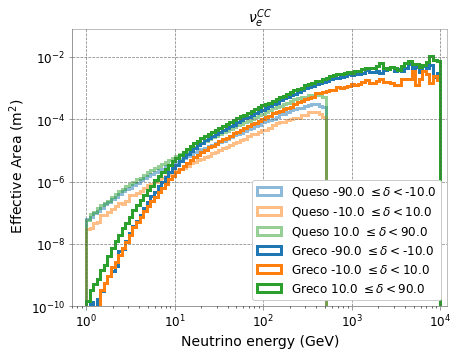

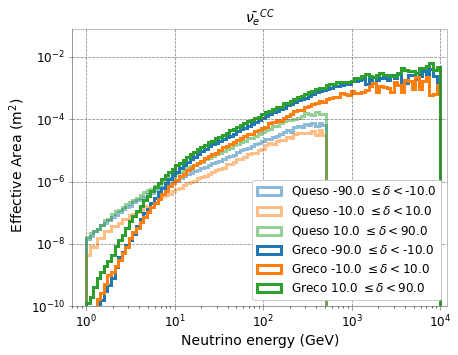

In [6]:
ebins = np.logspace(0, 4, 100)
dec_bins = np.radians([-90, -10, 10, 90])

#e and ebar
GeneratePlot(ebins,dec_bins,queso_e_only_CC,  greco_e_only_CC,  r'\nu_{e}^{CC}')
#GeneratePlot(ebins,dec_bins,queso_e_only_NC,  greco_e_only_NC,  r'\nu_{e}^{NC}')

GeneratePlot(ebins,dec_bins,queso_ebar_only_CC,  greco_ebar_only_CC,  r'\bar{\nu_{e}}^{CC}')
#GeneratePlot(ebins,dec_bins,queso_ebar_only_NC,  greco_ebar_only_NC,  r'\bar{\nu_{e}}^{NC}')

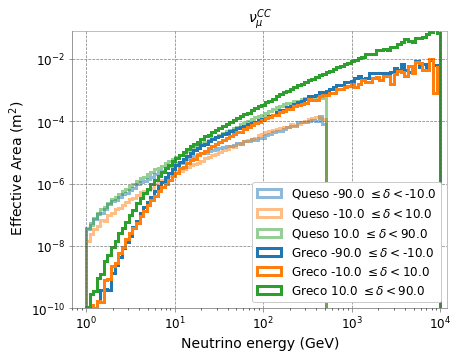

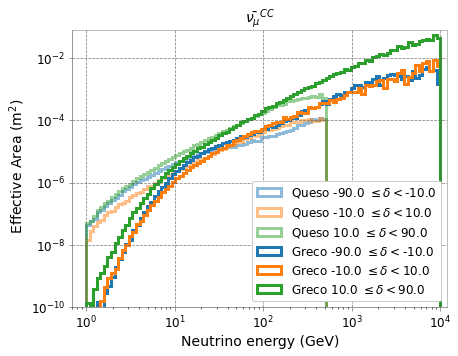

In [90]:
#mu and mubar
GeneratePlot(ebins,dec_bins,queso_mu_only_CC,  greco_mu_only_CC,  r'\nu_{\mu}^{CC}')
#GeneratePlot(ebins,dec_bins,queso_mu_only_NC,  greco_mu_only_NC,  r'\nu_{\mu}^{NC}')
GeneratePlot(ebins,dec_bins,queso_mubar_only_CC,  greco_mubar_only_CC,  r'\bar{\nu_{\mu}}^{CC}')
#GeneratePlot(ebins,dec_bins,queso_mubar_only_NC,  greco_mubar_only_NC,  r'\bar{\nu}_{\mu}^{NC}')

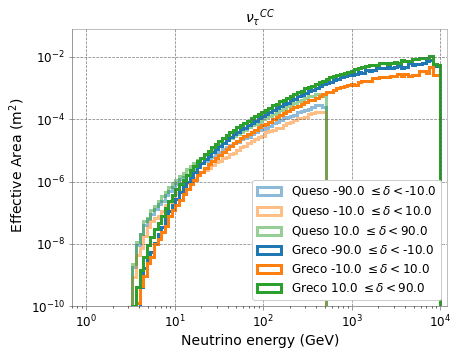

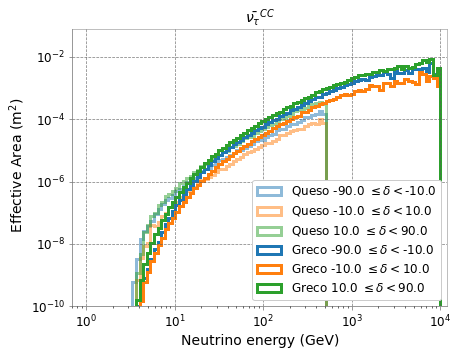

In [91]:
#tau and taubar
GeneratePlot(ebins,dec_bins,queso_tau_only_CC,  greco_tau_only_CC,  r' {\nu_\tau}^{CC}')
#GeneratePlot(ebins,dec_bins,queso_tau_only_NC,  greco_tau_only_NC,  r'\{nu_\tau}^{NC}')

GeneratePlot(ebins,dec_bins,queso_taubar_only_CC,  greco_taubar_only_CC,  r'\bar{\nu_\tau}^{CC}')
#GeneratePlot(ebins,dec_bins,queso_taubar_only_NC,  greco_taubar_only_NC,  r'\bar{\nu_\tau}^{NC}')

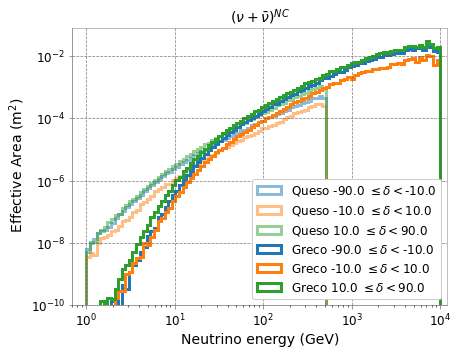

In [92]:
#NC all
#GeneratePlot(ebins,dec_bins,np.concatenate([queso_e_only_NC,queso_mu_only_NC,queso_tau_only_NC]),np.concatenate([greco_e_only_NC,greco_mu_only_NC,greco_tau_only_NC]), r'\nu^{NC}' )
#GeneratePlot(ebins,dec_bins,np.concatenate([queso_ebar_only_NC,queso_mubar_only_NC,queso_taubar_only_NC]),np.concatenate([greco_ebar_only_NC,greco_mubar_only_NC,greco_taubar_only_NC]), r'\bar{\nu}^{NC}' )
GeneratePlot(ebins,dec_bins,queso_all_NC,  greco_all_NC,  r'(\nu + \bar{\nu})^{NC}')

## intersection points

Look up to which point QUESO shows a higher effective area than GRECO. 

Here, the calculated data from above is read into a dictionary and plotted

In [7]:
def read_intersection_data(filename):
    data_by_declination = {}  # Dictionary to store data for each declination
    try:
        with open(filename, 'r') as file:
            for line in file:
                # Split each line into three parts based on spaces
                parts = line.split()

                # Extract the values and convert to appropriate types
                intersection_point = float(parts[0])
                declination = float(parts[1])
                nametag = ' '.join(parts[2:]).strip()

                # Check if the declination is already a key in the dictionary
                if declination not in data_by_declination:
                    data_by_declination[declination] = {'NC': {'intersection_points': [], 'nametags': []},
                                                         'CC': {'intersection_points': [], 'nametags': []}}

                # Determine whether "NC" or "CC" and append data accordingly
                category_key = 'NC' if 'NC' in nametag else 'CC'
                data_by_declination[declination][category_key]['intersection_points'].append(intersection_point)
                data_by_declination[declination][category_key]['nametags'].append(nametag)

    except FileNotFoundError:
        print(f"File '{filename}' not found.")

    # Sort data based on whether nametag includes "NC" or "CC"
    for declination, data in data_by_declination.items():
        for category_key in data.keys():
            # Extract data for each declination and category
            intersection_points = data[category_key]['intersection_points']
            nametags = data[category_key]['nametags']

            # Sort based on whether nametag includes "NC" or "CC"
            sorted_indices = sorted(range(len(nametags)), key=lambda i: ("CC" in nametags[i], nametags[i]))

            # Update data with sorted arrays
            data_by_declination[declination][category_key]['intersection_points'] = [intersection_points[i] for i in sorted_indices]
            data_by_declination[declination][category_key]['nametags'] = [nametags[i] for i in sorted_indices]

    return data_by_declination

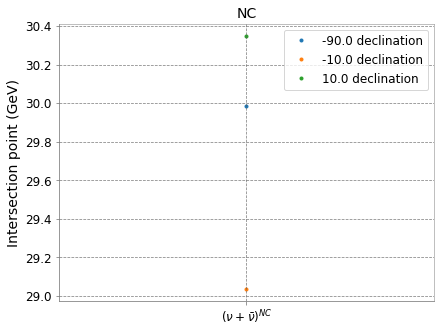

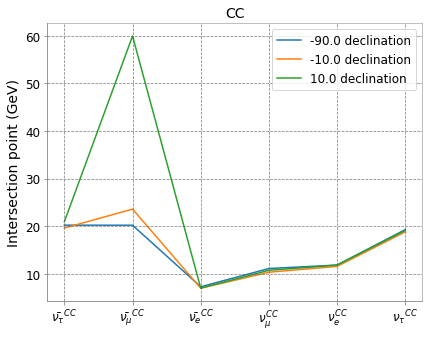

In [8]:
filename = "Intersections_latex.txt"
data_by_declination = read_intersection_data(filename)

# Create lists to store combined data for NC and CC
all_nc_intersection_points = []
all_cc_intersection_points = []
all_nc_nametags = []
all_cc_nametags = []
all_decs = []

# Sort data for each declination and category (NC/CC)
for declination, data in data_by_declination.items():
    #print(f"Declination: {declination}")

    # Create lists to store combined data for NC and CC for the current declination
    nc_intersection_points = []
    cc_intersection_points = []
    nc_nametags = []
    cc_nametags = []

    for category_key, category_data in data.items():
        #print(f"Category: {category_key}")

        # Append data to the corresponding lists based on category
        if "NC" in category_key:
            nc_intersection_points.extend(category_data['intersection_points'])
            nc_nametags.extend(category_data['nametags'])
        elif "CC" in category_key:
            cc_intersection_points.extend(category_data['intersection_points'])
            cc_nametags.extend(category_data['nametags'])

    # Append the current declination's data to the combined lists
    all_nc_intersection_points.append(nc_intersection_points)
    all_cc_intersection_points.append(cc_intersection_points)
    all_nc_nametags.append(nc_nametags)
    all_cc_nametags.append(cc_nametags)
    all_decs.append(declination)



# Create a single plot NC interactions intersection points across all declinations
fig = plt.figure(figsize = figsize,facecolor='white')
ax = fig.add_subplot(111)
format_plot(ax, grid=True, log=True)
for i,n,d in zip(all_nc_intersection_points,all_nc_nametags,all_decs):
    n = [r'$%s$' % ni.replace('', '') for ni in n]
    plt.plot(n, i,'.', label=str(d)+' declination')
plt.title('NC')
plt.legend()
plt.ylabel('Intersection point (GeV)')
fig.savefig(plotfolder + "1EffectiveArea_Intersection_CC.png",dpi=300, bbox_inches='tight')
plt.show()


# Create a single plot CC interactions intersection points across all declinations
fig = plt.figure(figsize = figsize,facecolor='white')
ax = fig.add_subplot(111)
format_plot(ax, grid=True, log=True)
for i,n,d in zip(all_cc_intersection_points,all_cc_nametags,all_decs):
    n = [r'$%s$' % ni.replace('','') for ni in n]
    plt.plot(n, i, label=str(d)+' declination')
plt.title('CC')
plt.legend()
plt.ylabel('Intersection point (GeV)')
fig.savefig(plotfolder + "1EffectiveArea_Intersection_CC.png",dpi=300, bbox_inches='tight')
plt.show()



# Resolution

recipy:
1) use trueRa, trueDec, ra, dec.
2) Reconstruted angular distance sigma (queso) / angErr (greco) not needed for resolution but we have a <font color='red'>Question:</font> are these the same? angErr does not exist from the converted queso files and looks like the conversion is done for it.
3) calculate true angular distance: arccos(...)
4) using true energy and true angular distance, calculate the resolution per energy bin

## Angular distance

In [106]:
def CalculateTrueAngularDistance(data):

    true_ra = data['trueRa']
    true_dec = data['trueDec']
    reco_ra = data['ra']
    reco_dec = data['dec']

    
    '''Calculates angular distance between two points. Units must be given in radians'''
    # Calculate the cosine of the angle (in radians)
    cos_angle = np.sin(true_ra) * np.sin(reco_ra) + np.cos(true_ra) * np.cos(reco_ra) * np.cos(reco_dec - true_dec)

    # Ensure the cosine value is valid
    cos_angle = np.clip(cos_angle, -1.0, 1.0)

    # Calculate the angle (in radians)
    angle_rad = np.arccos(cos_angle)
    return angle_rad

def PlotAngularDistance(true_angular_distance,reco_angular_distance,weighting,tag,atmoweights=False):
    '''Plots a 2D histogram of true and reconstructed angular distance'''
    binning=np.logspace(-1,3,25)
    
    fig = plt.figure(figsize = figsize,facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)
    
    h = plt.hist2d(np.degrees(true_angular_distance), np.degrees(reco_angular_distance), bins=binning, cmap='Blues', weights=weighting)#, norm=LogNorm())

    if atmoweights:
        cbar = plt.colorbar(h[3],  label=r'Atmospheric weights')#, norm=LogNorm())
    else:
        cbar = plt.colorbar(h[3],  label=r'ow $\cdot$ $E_{true}^{-2.5}$')#, norm=LogNorm())
    
    #add information
    plt.xlabel('True angular distance (deg)')
    plt.ylabel('Reco angular distance (deg)')
    plt.title(tag)
    
    #axis
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(10**-1,10**2)
    plt.ylim(10**-1,10**2)
    plt.plot([0, 500], [0, 500], c='black')

    plt.savefig(plotfolder+"2AngularDistances_%s.png"%converttag(tag),dpi=300, bbox_inches='tight')
    plt.show()

## True angular distance vs Reco angular distance

<Figure size 360x252 with 0 Axes>

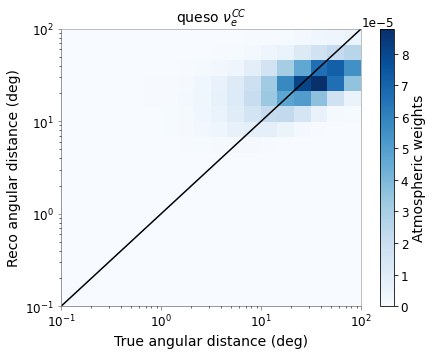

<Figure size 360x252 with 0 Axes>

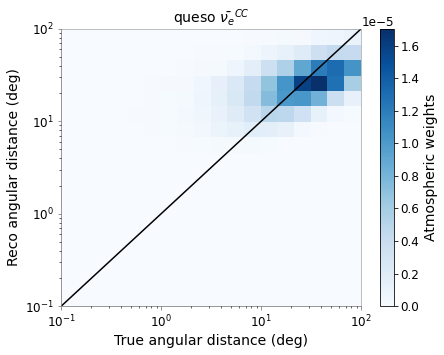

<Figure size 360x252 with 0 Axes>

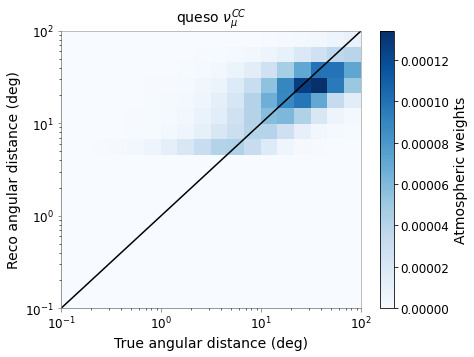

<Figure size 360x252 with 0 Axes>

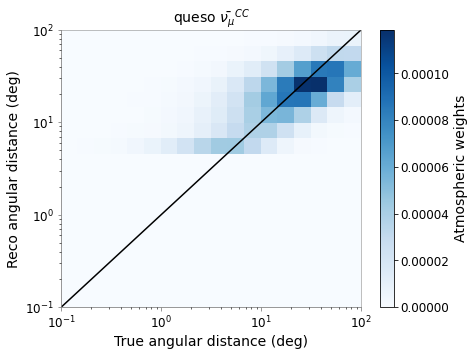

<Figure size 360x252 with 0 Axes>

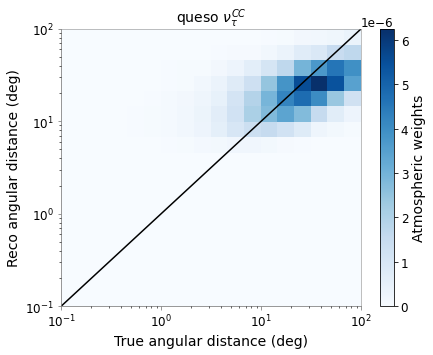

<Figure size 360x252 with 0 Axes>

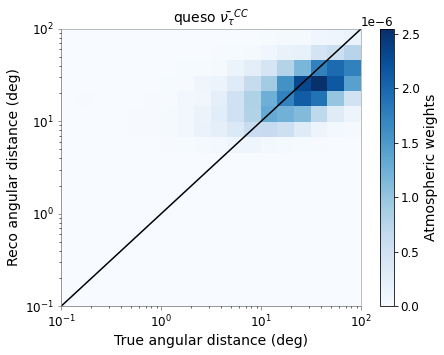

<Figure size 360x252 with 0 Axes>

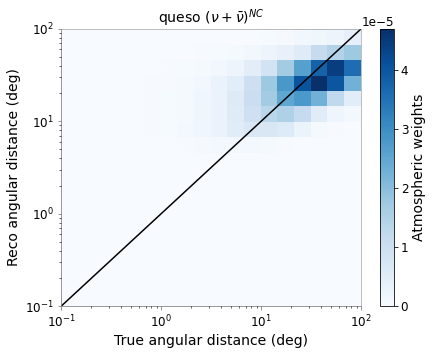

In [107]:
#Queso
#True energy
files = [queso_e_only_CC, queso_ebar_only_CC, queso_mu_only_CC, queso_mubar_only_CC, queso_tau_only_CC, queso_taubar_only_CC, queso_all_NC]
labels = [r'$\nu_e^{CC}$', r'$\bar{\nu_e}^{CC}$', r'$\nu_\mu^{CC}$', r'$\bar{\nu_\mu}^{CC}$', r'$\nu_\tau^{CC}$', r'$\bar{\nu_\tau}^{CC}$', r'$(\nu + \bar{\nu})^{NC}$' ]

for data, tag in zip(files,labels):
    ax = plt.figure(figsize=(5,3.5),facecolor='white')
    reco_angular_distance = data['sigma']
    true_angular_distance = CalculateTrueAngularDistance(data)
    
    #weights = data['ow'] * data['trueE']**(-2.5)
    #PlotAngularDistance(true_angular_distance, reco_angular_distance, weights,tag)

    weights = data['atmo_weight']
    #PlotAngularDistance(true_angular_distance, reco_angular_distance, weights,tag+" atmospheric",atmoweights=True)
    PlotAngularDistance(true_angular_distance, reco_angular_distance, weights,"queso "+tag,atmoweights=True)



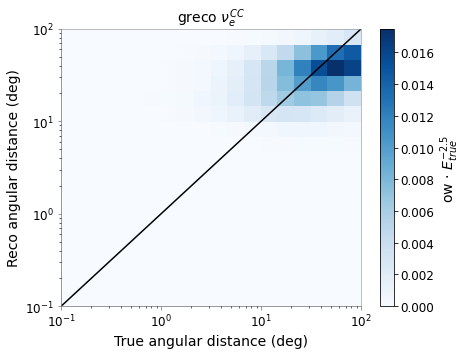

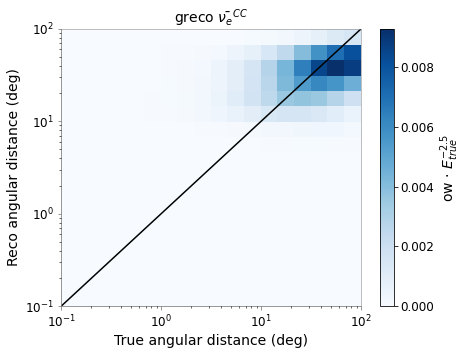

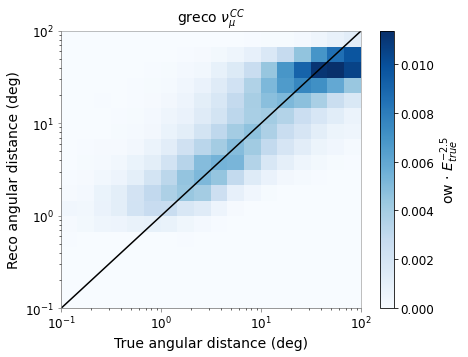

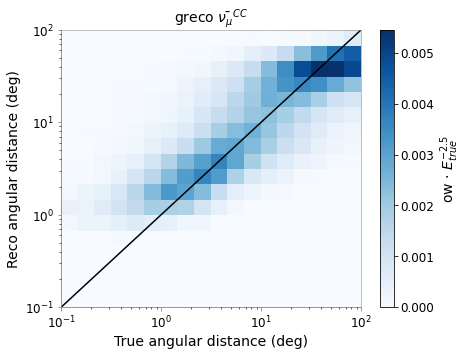

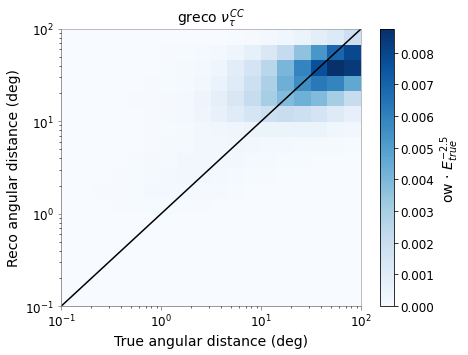

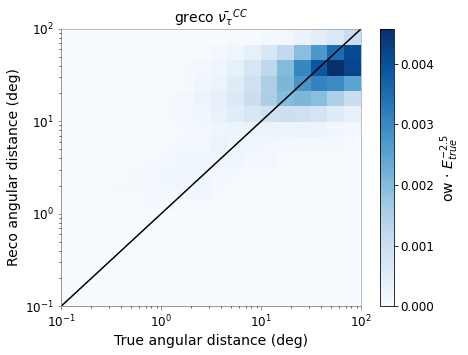

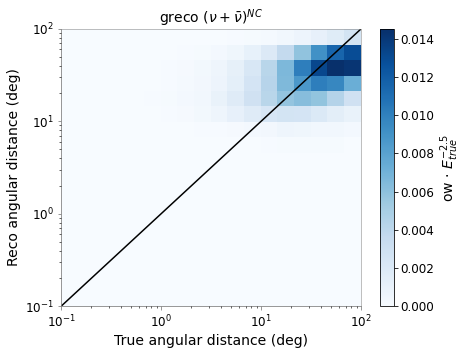

In [108]:
#Greco
files = [greco_e_only_CC, greco_ebar_only_CC, greco_mu_only_CC, greco_mubar_only_CC, greco_tau_only_CC, greco_taubar_only_CC, greco_all_NC]
labels = [r'$\nu_e^{CC}$', r'$\bar{\nu_e}^{CC}$', r'$\nu_\mu^{CC}$', r'$\bar{\nu_\mu}^{CC}$', r'$\nu_\tau^{CC}$', r'$\bar{\nu_\tau}^{CC}$', r'$(\nu + \bar{\nu})^{NC}$' ]

for data, tag in zip(files,labels):
    reco_angular_distance = data['angErr']
    true_angular_distance = CalculateTrueAngularDistance(data)
    weights = data['ow'] * data['trueE']**(-2.5)
    
    PlotAngularDistance(true_angular_distance, reco_angular_distance, weights,"greco "+tag)

## True angular distance vs True energy

this code was modified from cskys tutorial page: https://software.icecube.wisc.edu/csky/main/misc_plotting.html

In [109]:
def ResolutionVsTrueEnergy(data,logEbins,tag,title=None,atmoweight=False):
    #grab data
    true_angular_distance = CalculateTrueAngularDistance(data)
    true_energy  = data["trueE"]
    if atmoweight:
        weights = data['atmo_weight']
    else:
        weights = data['ow'] * data['trueE']**(-2.5)
    
    # create a histogram:
    h = hl.hist_slide(
        # slide the bins 5 times along energy, hold them still along angular error
        (5,1),
        # 2D histogram of true energy and angular error in degrees
        (true_energy, np.degrees(true_angular_distance)),
        # E^-2.5 weighting
        weights,
        # from 1 GeV to 1 TeV, plus a bit so there are bins at the endpoints
        bins=(10**logEbins, np.r_[0:180.01:.5])
    )
    
    # normalize along the angular error axis
    h = h.normalize(1)
    # get 20%, 50%, and 80% quantiles
    h2 = h.contain(1, .2)
    h5 = h.contain(1, .5)
    h8 = h.contain(1, .8)

    
    #plot results
    soft_colors = ['#004466', '#d06050', '#2aca80', '#dd9388', '#caca68']
    
    fig = plt.figure(figsize = (4.5,3.5),facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)
    
    # plot quantiles, emphasize median
    color = soft_colors[0]
    hl.fill_between(ax, 0, h2, color=color, alpha=.3, drawstyle='line')
    hl.fill_between(ax, 0, h5, color=color, alpha=.3, drawstyle='line')
    hl.fill_between(ax, 0, h8, color=color, alpha=.3, drawstyle='line')
    hl.plot1d (ax, h5, color=color, lw=2, drawstyle='default')
    
    # trick to get the legend handles colored right
    # try testing what happens if you just do hl.fill_between(..., label='...')
    nans = [np.nan, np.nan]
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**1, label='80%')
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**2, label='50%')
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**3, label='20%')
    
    # labels etc
    ax.semilogx()
    ax.set_xlabel(r'$E_\mathrm{true}$ (GeV)')
    ax.set_ylabel(r'$\Delta\Psi[\mathrm{true,reco}]$ (deg)')
    ax.set_xlim(h.bins[0][1], h.bins[0][-2])
    ax.set_ylim(0)
    #ax.legend(loc='upper right')
    plt.legend(title=title,bbox_to_anchor=(0,1.001,1,0.2), loc="lower left",    mode="expand", borderaxespad=0, ncol=3)
    
    #plt.title(tag)
    


    plt.xlim(1,475) #cuts off greco's higher energies for consistent layout
    plt.ylim(0,125) #fix y axis manually for comparison
    
    plt.tight_layout()
    plt.savefig(plotfolder + '3Resolution_Energy_%s.png'%converttag(tag),dpi=300)
    plt.show()

    return h5

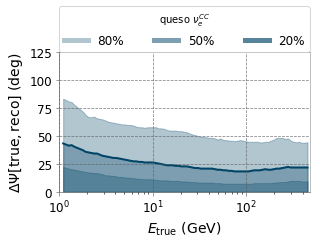

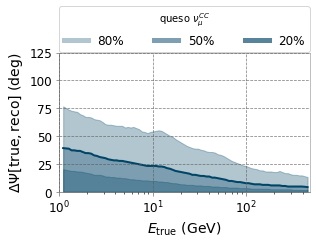

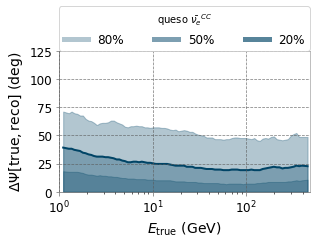

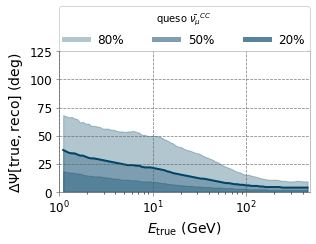

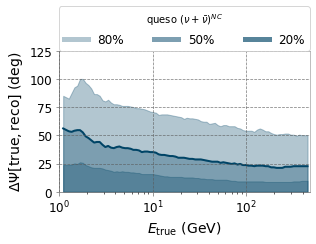

Hist(86 bins in [1.0,501.18723362727195], with sum 2789.5, 0 empty bins, and 0 non-finite values)

In [110]:
#QUESO
queso_binning = np.r_[0:2.76:.15]

#ResolutionVsTrueEnergy(dataset , bins , filename tag, title tag, atmos weight (bool))
ResolutionVsTrueEnergy(queso_e_only_CC,queso_binning,'queso_nue_CC', r'$\mathrm{queso} \ \nu_e^{CC} $',atmoweight=True)
ResolutionVsTrueEnergy(queso_mu_only_CC,queso_binning,'queso_numu_CC',r'$\mathrm{queso} \ \nu_\mu^{CC}$',atmoweight=True)
#ResolutionVsTrueEnergy(queso_tau_only_CC,queso_binning,'queso_nutau_NC+CC',r'$\mathrm{queso} \ \nu_\tau^{NC+CC}$',atmoweight=True)
ResolutionVsTrueEnergy(queso_ebar_only_CC,queso_binning,'queso_nuebar_CC', r'$\mathrm{queso} \ \bar{\nu_e}^{CC} $',atmoweight=True)
ResolutionVsTrueEnergy(queso_mubar_only_CC,queso_binning,'queso_numubar_CC',r'$\mathrm{queso} \ \bar{\nu_\mu}^{CC}$',atmoweight=True)
#ResolutionVsTrueEnergy(queso_taubar_only_CC,queso_binning,'queso_nutau_NC+CC',r'$\mathrm{queso} \ \bar{\nu_\tau]^{CC}$',atmoweight=True)
ResolutionVsTrueEnergy(queso_all_NC,queso_binning,'queso_all_NC',r'$\mathrm{queso} \ (\nu + \bar{\nu})^{NC}$',atmoweight=True)


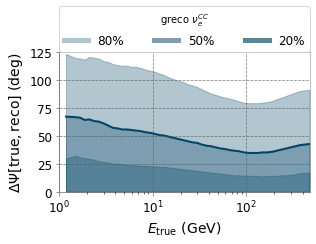

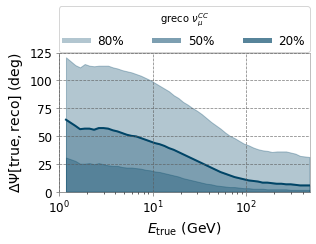

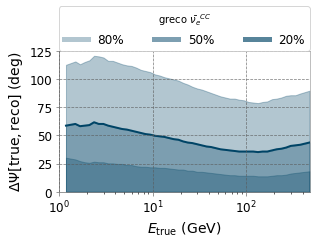

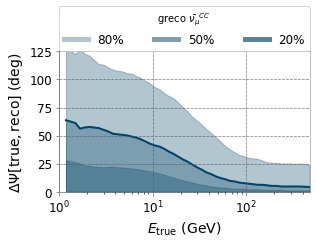

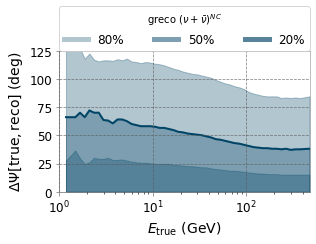

Hist(51 bins in [1.0,562.341325190349], with sum 2655.25, 0 empty bins, and 0 non-finite values)

In [111]:
#GRECO
greco_binning = np.r_[0:2.76:.25] #np.r_[0:4.01:.25]

#ResolutionVsTrueEnergy(dataset , bins , filename tag, title tag, atmos weight (bool))
ResolutionVsTrueEnergy(greco_e_only_CC,greco_binning,'greco_nue_CC', r'$\mathrm{greco} \ \nu_e^{CC} $')
ResolutionVsTrueEnergy(greco_mu_only_CC,greco_binning,'greco_numu_CC',r'$\mathrm{greco} \ \nu_\mu^{CC}$')
#ResolutionVsTrueEnergy(greco_tau_only_CC,greco_binning,'greco_nue_NC+CC',r'$\mathrm{greco} \ \nu_\tau^{CC}$')
ResolutionVsTrueEnergy(greco_ebar_only_CC,greco_binning,'greco_nuebar_CC', r'$\mathrm{greco} \ \bar{\nu_e}^{CC} $')
ResolutionVsTrueEnergy(greco_mubar_only_CC,greco_binning,'greco_numubar_CC',r'$\mathrm{greco} \ \bar{\nu_\mu}^{CC}$')
#ResolutionVsTrueEnergy(greco_taubar_only_CC,greco_binning,'greco_nue_NC+CC',r'$\mathrm{greco} \ \bar{\nu_\tau}^{CC}$')
ResolutionVsTrueEnergy(greco_all_NC,greco_binning,'greco_all_NC',r'$\mathrm{greco} \ (\nu + \bar{\nu})^{NC}$')

## True angular distance vs True Dec

In [112]:
def ResolutionVsTrueDec(data,binning,tag,title,atmoweight=False):
    #grab data
    true_angular_distance = CalculateTrueAngularDistance(data)
    true_dec = (data["trueDec"])
    if atmoweight:
        weights = data['atmo_weight']
    else:
        weights = data['ow'] * data['trueE']**(-2.5)
    bins = np.r_[min(true_dec):max(true_dec):.15]
    # create a histogram:
    h = hl.hist_slide(
        # slide the bins 5 times along energy, hold them still along angular error
        (5,1),
        # 2D histogram of true energy and angular error in degrees
        (true_dec, np.degrees(true_angular_distance)),
        # E^-2.5 or atmospheric weighting
        weights,
        # from 0 to 180 deg, plus a bit so there are bins at the endpoints
        bins=(bins, binning)
    )
    
    # normalize along the angular error axis
    h = h.normalize(1)
    # get 20%, 50%, and 80% quantiles
    h2 = h.contain(1, .2)
    h5 = h.contain(1, .5)
    h8 = h.contain(1, .8)

    
    #plot results
    soft_colors = ['#004466', '#d06050', '#2aca80', '#dd9388', '#caca68']
    
    fig = plt.figure(figsize = (4.5,3.5),facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)
    
    # plot quantiles, emphasize median
    color = soft_colors[0]
    hl.fill_between(ax, 0, h2, color=color, alpha=.3, drawstyle='line')
    hl.fill_between(ax, 0, h5, color=color, alpha=.3, drawstyle='line')
    hl.fill_between(ax, 0, h8, color=color, alpha=.3, drawstyle='line')
    hl.plot1d (ax, h5, color=color, lw=2, drawstyle='default')
    
    # trick to get the legend handles colored right
    # try testing what happens if you just do hl.fill_between(..., label='...')
    nans = [np.nan, np.nan]
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**1, label='80%')
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**2, label='50%')
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**3, label='20%')
    
    # labels etc
    #ax.semilogx()
    ax.set_xlabel(r'Dec$_\mathrm{true}$ (rad)')
    ax.set_ylabel(r'$\Delta\Psi[\mathrm{true,reco}]$ (deg)')
    ax.set_xlim(h.bins[0][1], h.bins[0][-2])
    ax.set_ylim(0,125)
    #ax.legend(loc='upper right')
    plt.legend(title=title,bbox_to_anchor=(0,1.001,1,0.2), loc="lower left",    mode="expand", borderaxespad=0, ncol=3)
   
    #plt.title(tag)
    
    #plt.xlim(2,475) #cuts off greco's higher energies for consistent layout
    #plt.ylim(0,130)
    
    plt.tight_layout()
    plt.savefig(plotfolder + '4Resolution_Dec_%s.png'%tag,dpi=300)
    plt.show()

    return h5

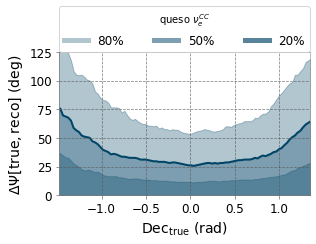

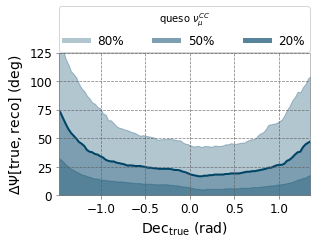

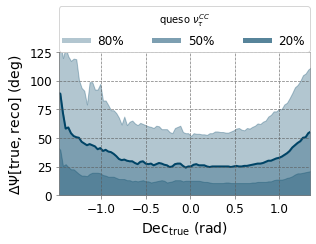

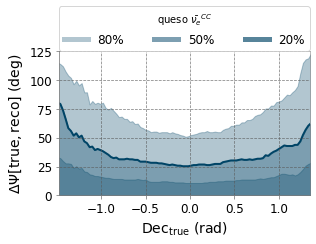

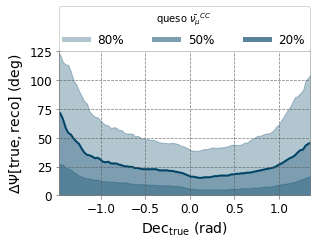

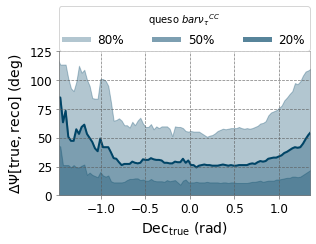

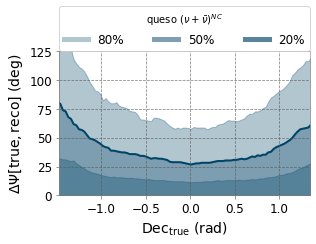

Hist(96 bins in [-1.5674638748168945,1.4325361251831037], with sum 3863.0, 0 empty bins, and 0 non-finite values)

In [113]:
#QUESO
queso_binning = np.r_[0:180.01:.5]

#ResolutionVsTrueDec(dataset , bins , filename tag, title tag, atmos weight (bool))
ResolutionVsTrueDec(queso_e_only_CC,queso_binning,'queso_nue_CC', r'$\mathrm{queso} \ \nu_e^{CC} $',atmoweight=True)
ResolutionVsTrueDec(queso_mu_only_CC,queso_binning,'queso_numu_CC',r'$\mathrm{queso} \ \nu_\mu^{CC}$',atmoweight=True)
ResolutionVsTrueDec(queso_tau_only_CC,queso_binning,'queso_nutau_NC+CC',r'$\mathrm{queso} \ \nu_\tau^{CC}$',atmoweight=True)
ResolutionVsTrueDec(queso_ebar_only_CC,queso_binning,'queso_nuebar_CC', r'$\mathrm{queso} \ \bar{\nu_e}^{CC} $',atmoweight=True)
ResolutionVsTrueDec(queso_mubar_only_CC,queso_binning,'queso_numubar_CC',r'$\mathrm{queso} \ \bar{\nu_\mu}^{CC}$',atmoweight=True)
ResolutionVsTrueDec(queso_taubar_only_CC,queso_binning,'queso_nutau_NC+CC',r'$\mathrm{queso} \ bar{\nu_\tau}^{CC}$',atmoweight=True)
ResolutionVsTrueDec(queso_all_NC,queso_binning,'queso_all_NC',r'$\mathrm{queso} \ (\nu + \bar{\nu})^{NC}$',atmoweight=True)


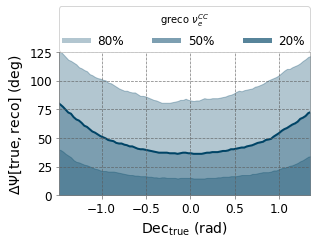

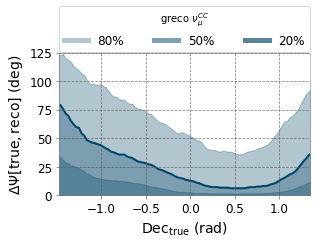

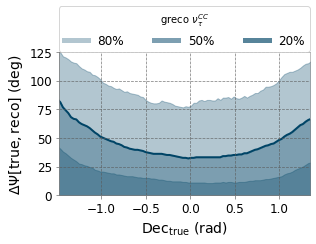

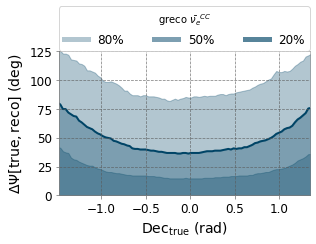

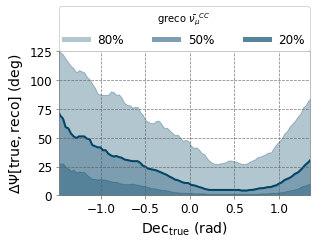

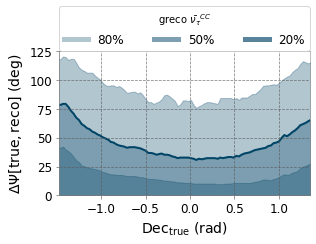

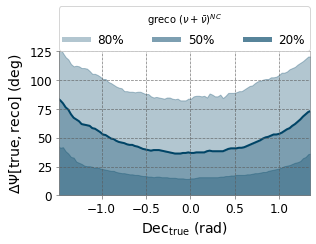

Hist(96 bins in [-1.568733811378479,1.4312661886215192], with sum 4728.5, 0 empty bins, and 0 non-finite values)

In [114]:
#GRECO
greco_binning = np.r_[0:180.01:.5]

#ResolutionVsTrueDec(dataset , bins , filename tag, title tag, atmos weight (bool))
ResolutionVsTrueDec(greco_e_only_CC,greco_binning,'greco_nue_CC', r'$\mathrm{greco} \ \nu_e^{CC} $')
ResolutionVsTrueDec(greco_mu_only_CC,greco_binning,'greco_numu_CC',r'$\mathrm{greco} \ \nu_\mu^{CC}$')
ResolutionVsTrueDec(greco_tau_only_CC,greco_binning,'greco_nutau_NC+CC',r'$\mathrm{greco} \ \nu_\tau^{CC}$')
ResolutionVsTrueDec(greco_ebar_only_CC,greco_binning,'greco_nuebar_CC', r'$\mathrm{greco} \ \bar{\nu_e}^{CC} $')
ResolutionVsTrueDec(greco_mubar_only_CC,greco_binning,'greco_numubar_CC',r'$\mathrm{greco} \ \bar{\nu_\mu}^{CC}$')
ResolutionVsTrueDec(greco_taubar_only_CC,greco_binning,'greco_nutau_NC+CC',r'$\mathrm{greco} \ \bar{\nu_\tau}^{CC}$')
ResolutionVsTrueDec(greco_all_NC,greco_binning,'greco_all_NC',r'$\mathrm{greco} \ (\nu + \bar{\nu})^{NC}$')

# Background rates

## Queso

In [12]:
rate_nueCC=np.sum(queso_e_only_CC['atmo_weight'])
rate_nueNC=np.sum(queso_e_only_NC['atmo_weight'])
rate_numuCC=np.sum(queso_mu_only_CC['atmo_weight'])
rate_numuNC=np.sum(queso_mu_only_NC['atmo_weight'])
rate_nutauCC=np.sum(queso_tau_only_CC['atmo_weight'])
rate_nutauNC=np.sum(queso_tau_only_NC['atmo_weight'])

rate_all=[rate_nueCC,rate_nueNC,rate_numuCC,rate_numuNC,rate_nutauCC,rate_nutauNC]
print("Background rate for neutrinos")
for r in rate_all:
    var_name = [name for name, value in locals().items() if value is r][0]
    print(f"{var_name}:\t{r*1000:.3f} mHz")
print("All flavors: \t%1.3f mHz"%(sum(rate_all) * 1000))

Background rate for neutrinos
rate_nueCC:	1.322 mHz
rate_nueNC:	0.117 mHz
rate_numuCC:	2.600 mHz
rate_numuNC:	0.337 mHz
rate_nutauCC:	0.118 mHz
rate_nutauNC:	0.094 mHz
All flavors: 	4.587 mHz


In [14]:

rate_nuebarCC=np.sum(queso_ebar_only_CC['atmo_weight'])
rate_nuebarNC=np.sum(queso_ebar_only_NC['atmo_weight'])
rate_numubarCC=np.sum(queso_mubar_only_CC['atmo_weight'])
rate_numubarNC=np.sum(queso_mubar_only_NC['atmo_weight'])
rate_nutaubarCC=np.sum(queso_taubar_only_CC['atmo_weight'])
rate_nutaubarNC=np.sum(queso_taubar_only_NC['atmo_weight'])

rate_all=[rate_nuebarCC,rate_nuebarNC,rate_numubarCC,rate_numubarNC,rate_nutaubarCC,rate_nutaubarNC]
print("Background rate for anti neutrinos (not needed)")
for r in rate_all:
    var_name = [name for name, value in locals().items() if value is r][1]
    print(f"{var_name}:\t{r*1000:.3f} mHz")
print("All flavors: \t%1.3f mHz"%(sum(rate_all) * 1000))

Background rate for anti neutrinos (not needed)
rate_nuebarCC:	0.261 mHz
rate_nuebarNC:	0.017 mHz
rate_numubarCC:	2.361 mHz
rate_numubarNC:	0.209 mHz
rate_nutaubarCC:	0.049 mHz
rate_nutaubarNC:	0.027 mHz
All flavors: 	2.925 mHz


## Greco

In [15]:
#Greco rate estimation
grl = [np.load(x) for x in glob.glob("/data/ana/analyses/greco_online/version-002-p12/GRL/*")]
grl = np.concatenate(grl)
greco_rate = grl['events'].sum() / grl['livetime'].sum()  # This will give the rate in events/day
greco_rate = greco_rate / (60*60*24)
print(f"Greco background: {greco_rate*1000:.2f} mHz")

Greco background: 4.57 mHz


Recreating a 7 day average rate plot like this https://wiki.icecube.wisc.edu/index.php/GRECO-GRB_Coincidences#Data_Rate

using std for now instead of percentiles

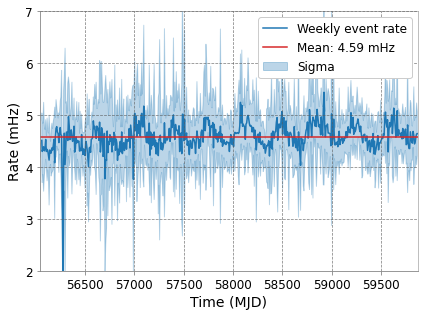

In [42]:
time_data_mjd = grl['start']  # Array mit Zeitdaten in MJD
events_data = grl['events']   # Array mit Anzahl der Ereignisse entsprechend den Zeitdaten
timeintervall = grl['livetime']

#Sort
#time_data_days = time_data_mjd - np.min(time_data_mjd)  # Set time series to 0
sorted_indices = np.argsort(time_data_mjd)
time = time_data_mjd[sorted_indices]
event = events_data[sorted_indices]
intervall = timeintervall[sorted_indices]

# Determine the number of bins
time_window = 7 #days
num_bins = int(np.ceil((time[-1] - time[0]) / time_window))

# Bin data
time_bin_edges = np.linspace(time[0], time[-1], num_bins + 1)
digitized = np.digitize(time, time_bin_edges)
event_per_day = event / (intervall * 24 * 60 * 60)

# Calculate averages and standard deviations. Should be redone with percentiles
time_average = np.array([np.mean(time[digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, num_bins + 1)])
event_average = np.array([np.mean(event_per_day[digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, num_bins + 1)]) * 1000
event_sigma = np.array([np.std(event_per_day[digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, num_bins + 1)]) * 1000

# Calculate lower and upper bounds
y_lower = event_average - event_sigma
y_upper = event_average + event_sigma

fig = plt.figure(figsize = figsize,facecolor='white')
ax = fig.add_subplot(111)
format_plot(ax, grid=True, log=True)

plt.plot(time_average,event_average,label="Weekly event rate")
plt.fill_between(time_average, y_lower, y_upper, alpha=0.3, label='Sigma', color='C0')
plt.axhline(np.nanmean(event_average),color ="C3",label=r"Mean: %1.2f mHz"%(np.nanmean(event_average)))

#information
plt.xlabel("Time (MJD)")
plt.ylabel("Rate (mHz)")#(10⁻³ 1/s)
plt.legend(framealpha=1,fancybox=True)

#axis
plt.xlim(min(time),max(time))
plt.ylim(2,7)

plt.tight_layout()
plt.savefig(plotfolder+"3_7dayAverageRate_Greco.png",dpi=300)
plt.show()

<font color='red'>Cells below still need to be adjusted after fixing the weights</font> 

# Energy

## True vs reconstructed

In [43]:
def PlotTrueVsRecoEnergies(true_energy,reco_energy,weighting,tag,atmoweight=False):
    '''Plots a 2D histogram of true and reconstructed energy'''
    
    binning=np.logspace(0,3,50)
    
    fig = plt.figure(figsize = (4.5,3),facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)

    
    h = plt.hist2d(true_energy, reco_energy, bins=binning, cmap='Blues', weights=weighting)#, norm=LogNorm()

    if atmoweight:
        cbar = plt.colorbar(h[3], label=r'Atmospheric weight')# norm=LogNorm()
        plt.title(tag)
        tag += " atmospheric"
    else:
        cbar = plt.colorbar(h[3], label=r'ow $\cdot$ $E_{true}^{-2.5}$')# norm=LogNorm()
        plt.title(tag)
    
    #add information
    plt.xlabel('True energy (GeV)')
    plt.ylabel('Reconstructed energy (GeV)')
    
    
    #make it pretty
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(10**0,5*10**2)
    plt.ylim(10**0,7*10**2)
    plt.plot([0, 500], [0, 500], c='black')

    
    plt.tight_layout()
    plt.savefig(plotfolder+"4Energy_%s.png"%tag,dpi=300)
    plt.show()
    
def PlotTrueVsRecoEnergies_lin(true_energy,reco_energy,weighting,tag,atmoweight=False):
    '''Plots a 2D histogram of true and reconstructed energy'''
    
    binning=np.arange(0,1000,10)
    
    fig = plt.figure(figsize = (4.5,3),facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True)

   
    h = plt.hist2d(true_energy, reco_energy, bins=binning, cmap='Blues', weights=weighting, norm=LogNorm())

    if atmoweight:
        cbar = plt.colorbar(h[3], label=r'Atmospheric weight')
        plt.title(tag)
        tag += " atmospheric"
    else:
        cbar = plt.colorbar(h[3], label=r'ow $\cdot$ $E_{true}^{-2.5}$')
        plt.title(tag)
    
    #add information
    plt.xlabel('True energy (GeV)')
    plt.ylabel('Reconstructed energy (GeV)')
    
    
    #make it pretty

    plt.xlim(10**0,5*10**2)
    plt.ylim(10**0,7*10**2)
    plt.xticks(np.arange(0,501,100))
    plt.yticks(np.arange(0,701,100))
    plt.plot([0, 500], [0, 500], c='black')

    
    plt.tight_layout()
    plt.savefig(plotfolder+"4Energy_lin_%s.png"%tag,dpi=300)
    plt.show()

Cells below still need to be adjusted from an old script

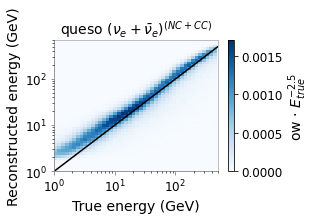

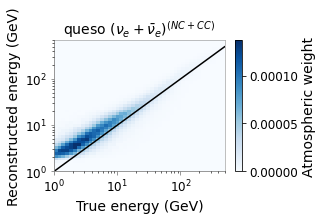

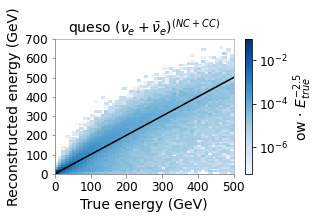

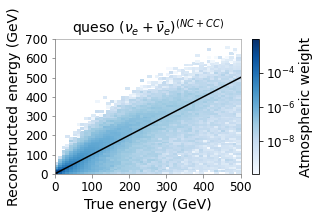

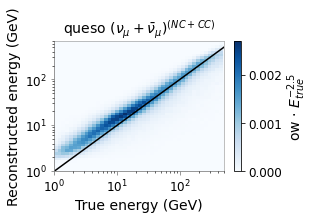

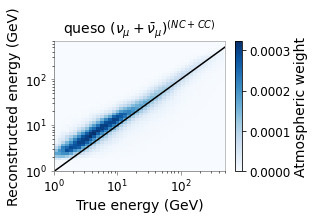

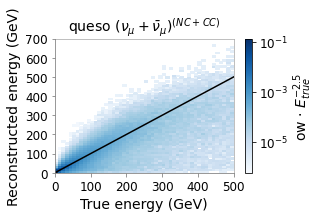

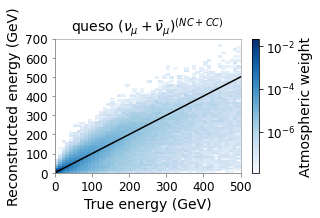

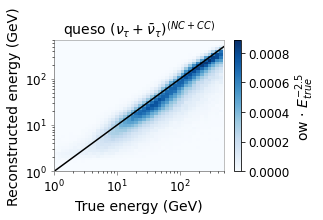

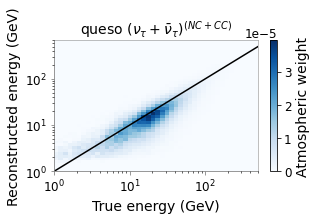

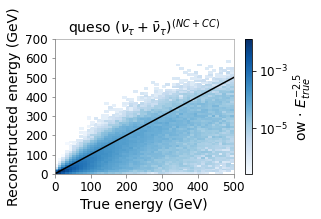

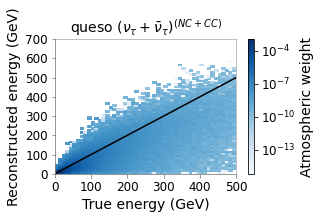

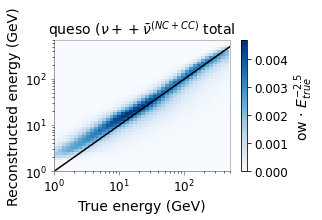

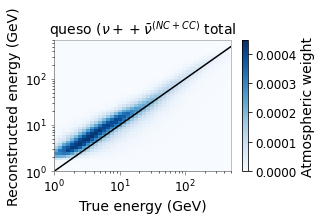

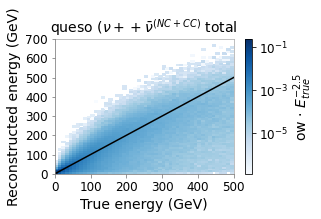

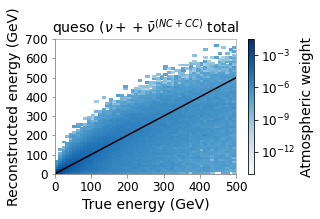

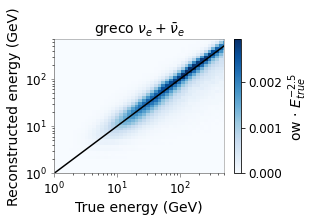

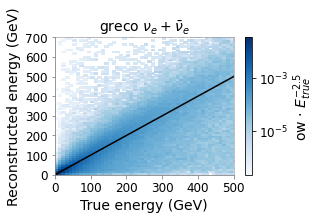

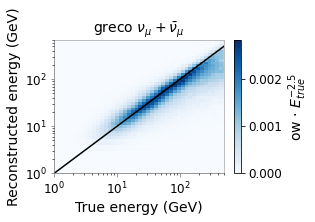

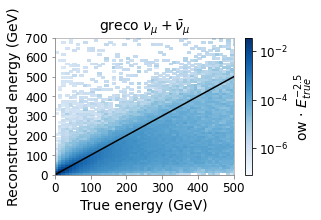

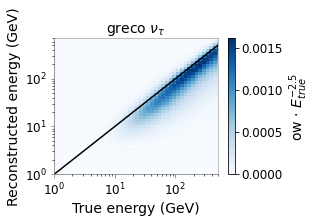

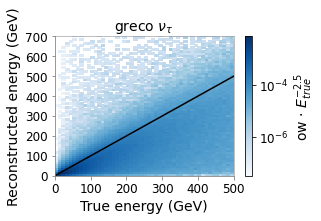

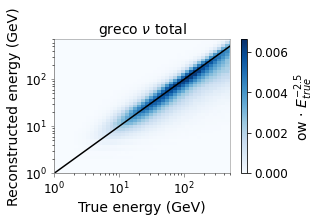

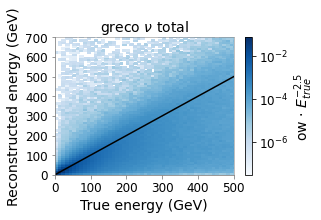

In [44]:
REDO LIKE ABOVE

files = [queso_e, queso_mu, queso_tau, queso_all]
labels = [r'queso $(\nu_e + \bar{\nu}_e)^{(NC+CC)}$', r'queso $(\nu_\mu + \bar{\nu}_\mu)^{(NC+CC)}$', r'queso $(\nu_\tau + \bar{\nu}_\tau)^{(NC+CC)}$', r'queso $(\nu+ + \bar{\nu}^{(NC+CC)}$ total']

for data, tag in zip(files,labels):
    true_energy = data['trueE']
    weights = data['ow'] * true_energy**(-2.5)
    reco_energy = data['graphnet_dynedge_energy_reconstruction_energy_pred']
    PlotTrueVsRecoEnergies(true_energy,reco_energy,weights,tag)
    PlotTrueVsRecoEnergies(true_energy,reco_energy,data['atmo_weight'],tag,atmoweight=True)
    PlotTrueVsRecoEnergies_lin(true_energy,reco_energy,weights,tag)
    PlotTrueVsRecoEnergies_lin(true_energy,reco_energy,data['atmo_weight'],tag,atmoweight=True)
        
#Greco
files = [greco_e, greco_mu, greco_tau, greco_all]
labels = [r'greco $\nu_e + \bar{\nu}_e$', r'greco $\nu_\mu + \bar{\nu}_\mu$', r'greco $\nu_\tau$', r'greco $\nu$ total']



for data, tag in zip(files,labels):
    true_energy = data['trueE']
    weights = data['ow'] * true_energy**(-2.5)
    reco_energy = 10**data['logE'] 
    PlotTrueVsRecoEnergies(true_energy,reco_energy,weights,tag)
    PlotTrueVsRecoEnergies_lin(true_energy,reco_energy,weights,tag)


## True dec vs Reco dec

In [50]:
def PlotTrueVsRecoDec(true_dec,reco_dec,weighting,tag,atmoweight=False):
    '''Plots a 2D histogram of true and reconstructed energy'''
    
    #binning=np.logspace(0,3,50)
    
    fig = plt.figure(figsize = (4.5,3),facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)

    
    h = plt.hist2d(true_dec, reco_dec, bins=20, cmap='Blues', weights=weighting)#, norm=LogNorm()

    if atmoweight:
        cbar = plt.colorbar(h[3], label=r'Atmospheric weight')# norm=LogNorm()
        #plt.title(tag+" atmospheric")
    else:
        cbar = plt.colorbar(h[3], label=r'ow $\cdot$ $E_{true}^{-2.5}$')# norm=LogNorm()
    plt.title(tag)
    
    #add information
    plt.xlabel('True dec (rad)')
    plt.ylabel('Reconstructed dec (rad)')
    
    
    #make it pretty
    #plt.xscale('log')
    #plt.yscale('log')
   # plt.xlim(10**0,5*10**2)
    #plt.ylim(10**0,7*10**2)
    plt.plot([-5000, 500], [-500, 500], c='black')

    
    plt.tight_layout()
    plt.savefig(plotfolder+"4Dec_%s.png"%tag,dpi=300)
    plt.show()
    


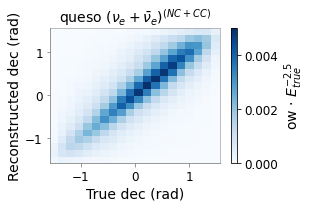

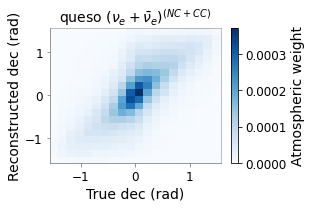

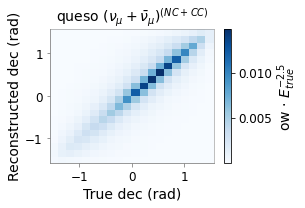

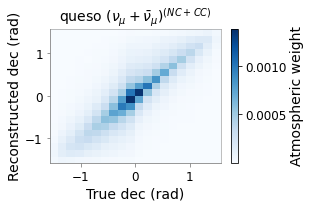

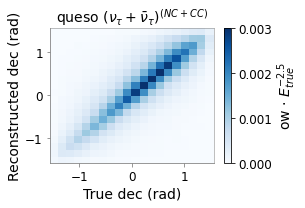

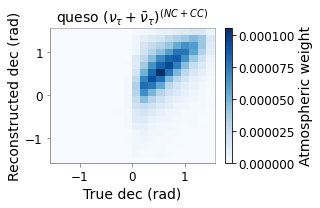

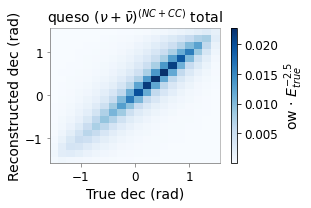

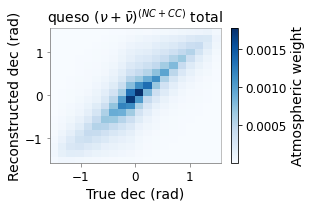

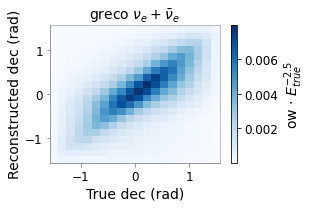

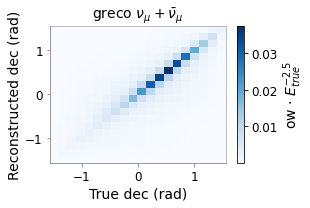

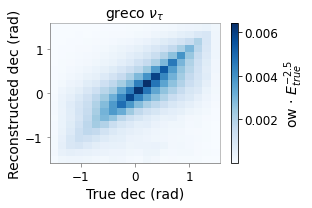

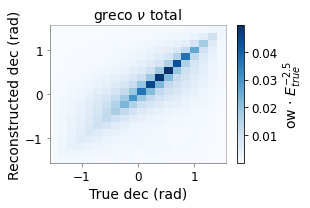

In [78]:
REDO like above


files = [queso_e, queso_mu, queso_tau, queso_all]
labels = [r'queso $(\nu_e + \bar{\nu}_e)^{(NC+CC)}$', r'queso $(\nu_\mu + \bar{\nu}_\mu)^{(NC+CC)}$', r'queso $(\nu_\tau + \bar{\nu}_\tau)^{(NC+CC)}$', r'queso $(\nu+ \bar{\nu})^{(NC+CC)}$ total']

for data, tag in zip(files,labels):
    true_dec = data['trueDec']
    true_energy = data['trueE']
    weights = data['ow'] * true_energy**(-2.5)
    reco_dec = data['dec']
    PlotTrueVsRecoDec(true_dec,reco_dec,weights,tag)
    PlotTrueVsRecoDec(true_dec,reco_dec,data['atmo_weight'],tag,atmoweight=True)
        
#Greco
files = [greco_e, greco_mu, greco_tau, greco_all]
labels = [r'greco $\nu_e + \bar{\nu}_e$', r'greco $\nu_\mu + \bar{\nu}_\mu$', r'greco $\nu_\tau$', r'greco $\nu$ total']



for data, tag in zip(files,labels):
    true_dec = data['trueDec']
    true_energy = data['trueE']
    weights = data['ow'] * true_energy**(-2.5)
    reco_dec = data['dec']
    PlotTrueVsRecoDec(true_dec,reco_dec,weights,tag)
    


# 1D energy distributions

Recreating plots like this https://wiki.icecube.wisc.edu/index.php/IceCube_Upgrade_Oscillations_2023_Public_Plots#Final_Level_Sample_1d_Distributions

<font color='red'>Question:</font> How can we obtain the background energy distribution (for greco)?

Here we still have the same question about the correct weighting from the background rates above.

### Queso

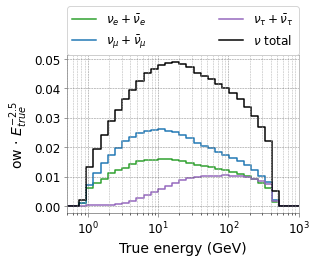

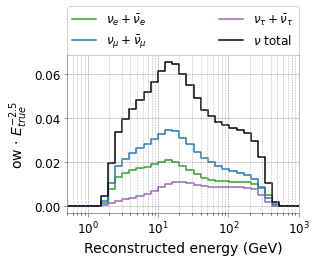

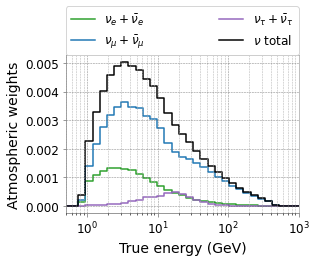

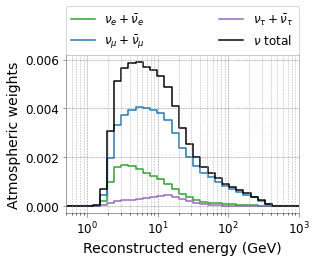

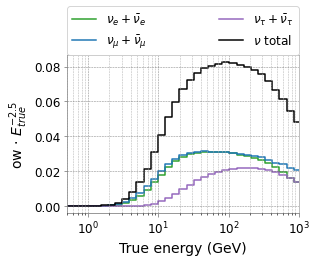

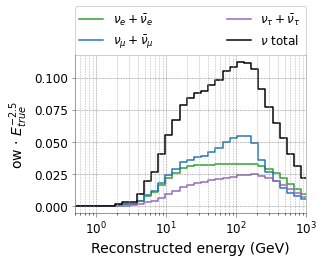

In [67]:
def PlotEnergyHisto(files,energykey,nametag,axistag,atmoweights=False,greco=False):
    # Define histogram parameters
    energy_range = (1e-1, 1e4)  # Set the range for the histogram in log scale
    bin_resolution = 0.1  # Set the bin width in log scale
    binning=np.logspace(np.log10(energy_range[0]), np.log10(energy_range[1]), int((np.log10(energy_range[1]) - np.log10(energy_range[0])) / bin_resolution))

    labels = [r'$\nu_e + \bar{\nu}_e$', r'$\nu_\mu + \bar{\nu}_\mu$', r'$\nu_\tau  + \bar{\nu}_\tau$', r'$\nu$ total']
    colors = ['tab:green','tab:blue','tab:purple','black']
    
    #True energy
    fig = plt.figure(figsize = (4.5,3.75),facecolor='white')
    ax = fig.add_subplot(111)
    format_plot(ax, grid=True, log=True)
    
    #files = [queso_e,queso_mu,queso_tau,queso_all]
    for data,tag,c in zip(files,labels,colors):
        if "greco" in nametag.lower() and "reco" in axistag.lower():
            te = 10**data["logE"]
        else:
            te = data[energykey] 
        
        if atmoweights:
            w = data["atmo_weight"]
            plt.ylabel('Atmospheric weights')
            #tag += " atmospheric"
        else:
            w = data["ow"]*data["trueE"]**(-2.5)
            plt.ylabel('ow $\cdot$ $E_{true}^{-2.5}$')
        #w = 1e-8 * data['ow'] * (data['trueE'] / 100) **(-2.5)
        
        hist, bin_edges = np.histogram(te, bins=binning,weights=w)
        plt.step(bin_edges[:-1], hist, where='mid',c=c, label=tag)
    
    plt.xlim(0.5,1e3)
    #plt.ylim(0,5)
    plt.xscale('log')
    plt.xlabel(axistag)
    #plt.title(nametag)
    plt.legend(bbox_to_anchor=(0,1.001,1,0.2), loc="lower left",    mode="expand", borderaxespad=0, ncol=2)
       
    #plt.legend(fancybox=True,framealpha=1)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig(plotfolder+"4Energy_1D_distributions_%s_%s.png"%(nametag,axistag.split(' ')[0]),dpi=300)
    plt.show()

#queso
files = [queso_e,queso_mu,queso_tau,queso_all]
PlotEnergyHisto(files,'trueE',"Queso","True energy (GeV)")
PlotEnergyHisto(files,'graphnet_dynedge_energy_reconstruction_energy_pred',"Queso","Reconstructed energy (GeV)")
PlotEnergyHisto(files,'trueE',"Queso atmospheric","True energy (GeV)",atmoweights=True)
PlotEnergyHisto(files,'graphnet_dynedge_energy_reconstruction_energy_pred',"Queso atmospheric","Reconstructed energy (GeV)",atmoweights=True)

#greco
files = [greco_e,greco_mu,greco_tau,greco_all]
PlotEnergyHisto(files,'trueE',"Greco","True energy (GeV)")
PlotEnergyHisto(files,'logE',"Greco","Reconstructed energy (GeV)")

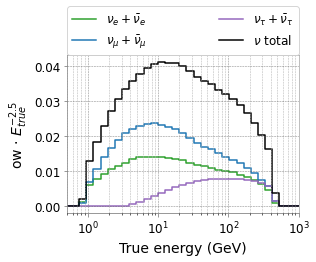

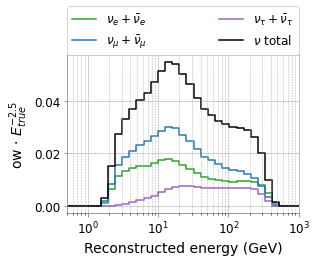

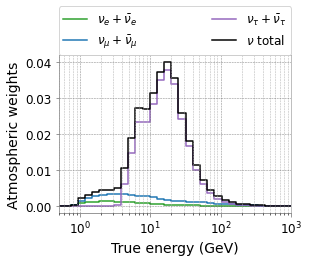

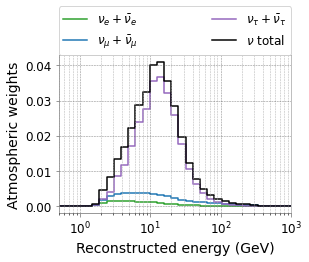

In [65]:
#CC
files = [queso_e_CC,queso_mu_CC,queso_tau_CC,queso_all_CC]
PlotEnergyHisto(files,'trueE',"Queso_CC","True energy (GeV)")
PlotEnergyHisto(files,'graphnet_dynedge_energy_reconstruction_energy_pred',"Queso_CC","Reconstructed energy (GeV)")
PlotEnergyHisto(files,'trueE',"Queso_CC atmospheric","True energy (GeV)",atmoweights=True)
PlotEnergyHisto(files,'graphnet_dynedge_energy_reconstruction_energy_pred',"Queso_CC atmospheric","Reconstructed energy (GeV)",atmoweights=True)

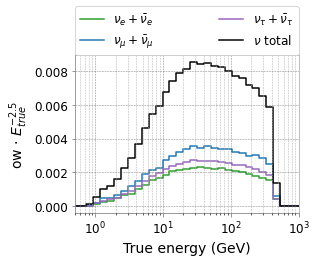

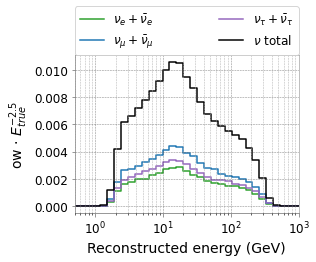

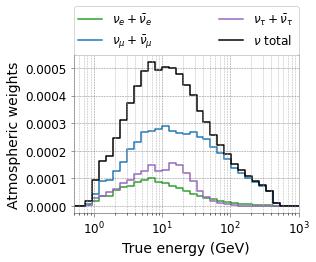

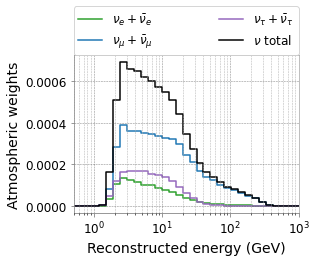

In [66]:
# NC
files = [queso_e_NC,queso_mu_NC,queso_tau_NC,queso_all_NC]
PlotEnergyHisto(files,'trueE',"Queso_NC","True energy (GeV)")
PlotEnergyHisto(files,'graphnet_dynedge_energy_reconstruction_energy_pred',"Queso_NC","Reconstructed energy (GeV)")
PlotEnergyHisto(files,'trueE',"Queso_NC atmospheric","True energy (GeV)",atmoweights=True)
PlotEnergyHisto(files,'graphnet_dynedge_energy_reconstruction_energy_pred',"Queso_NC atmospheric","Reconstructed energy (GeV)",atmoweights=True)

### Difference True-Reco comparison

I just played around, this is probably dumb

In [23]:
def EnergyHisto_1D_diff(diff1,diff2,w1,w2,tag,showplot=True):
    '''Plots a 1D histogram of difference between true - reconstructed energy and compares two datasets.'''
    
    # Define histogram parameters
    #energy_range = (1e-1, 1e4)  # Set the range for the histogram in log scale
    #bin_resolution = 0.1  # Set the bin width in log scale
    #binning=np.logspace(np.log10(energy_range[0]), np.log10(energy_range[1]), int((np.log10(energy_range[1]) - np.log10(energy_range[0])) / bin_resolution))
    binning=np.linspace(-500,500,100)
    
    # Create histogram
    hist1, bin_edges1 = np.histogram(diff1, bins=binning,weights=w1)
    hist2, bin_edges2 = np.histogram(diff2, bins=binning,weights=w2)
    
    ax = plt.figure(figsize=(5,3.5))
    plt.step(bin_edges1[:-1], hist1, where='mid', color='tab:blue', alpha=0.7, label='Queso')
    plt.step(bin_edges2[:-1], hist2, where='mid', color='tab:orange', alpha=0.7, label='Greco')

    #plt.xlim(1,500)
    #plt.ylim(1e-5,1e-1)
    #plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Misreconstructed energy (GeV)')
    plt.ylabel('Events per energy bin (a.u.)')
    plt.title(tag)
    plt.legend(fancybox=True,framealpha=1)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(plotfolder+"4Energy_1D_distributions_%s.png"%tag,dpi=300)
    plt.show()

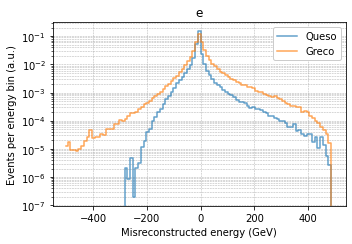

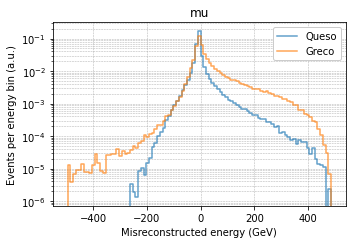

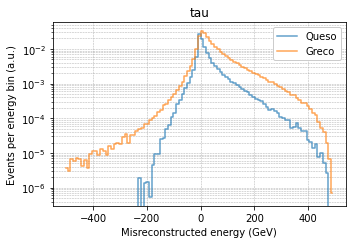

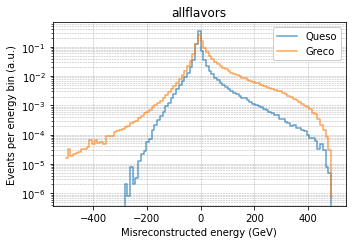

In [173]:
queso_files = [queso_e, queso_mu, queso_tau, queso_all] #needs to be first argument for label
greco_files = [greco_e, greco_mu, greco_tau, greco_all] #needs to be 2nd argument for label (I was lazy)
labels = ['e', 'mu', 'tau', 'allflavors']

for queso_data, greco_data, label in zip(queso_files, greco_files, labels):
    # Process queso data
    mask1 = queso_data['trueE'] < 500
    true_energy1 = queso_data['trueE'][mask1]
    reco_energy1 = queso_data['graphnet_dynedge_energy_reconstruction_energy_pred'][mask1]
    weights1 = queso_data['ow'][mask1] * queso_data['trueE'][mask1]**(-2.5)

    # Process greco data
    mask2 = greco_data['trueE'] < 500
    true_energy2 = greco_data['trueE'][mask2]
    reco_energy2 = 10**greco_data['logE'][mask2]
    weights2 = greco_data['ow'][mask2] * greco_data['trueE'][mask2]**(-2.5)

    # Generate plots
    EnergyHisto_1D_diff(true_energy1 - reco_energy1, true_energy2 - reco_energy2, weights1, weights2, label)
